In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df= pd.read_csv('Company_Data.csv')
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
df.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [6]:
df.shape

(400, 11)

<AxesSubplot:ylabel='Count'>

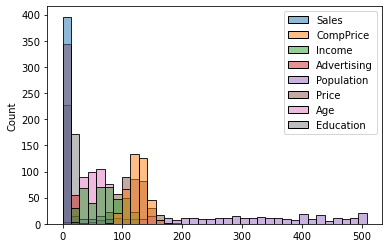

In [7]:
sns.histplot(df)

In [8]:
print(df.ShelveLoc.value_counts())

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64


In [9]:
print(df.Urban.value_counts())

Yes    282
No     118
Name: Urban, dtype: int64


In [10]:
print(df.US.value_counts())

Yes    258
No     142
Name: US, dtype: int64


In [11]:
# Converting Catagorical Variables by Using Map Function
df["ShelveLoc"]= df["ShelveLoc"].map({"Bad":0, "Medium":1, "Good":2})
df["Urban"]= df["Urban"].map({"No":0, "Yes":1})
df["US"]= df["US"].map({"No":0, "Yes":1})

In [12]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,2,65,10,1,1
2,10.06,113,35,10,269,80,1,59,12,1,1
3,7.40,117,100,4,466,97,1,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [13]:
print(df.ShelveLoc.value_counts())

1    219
0     96
2     85
Name: ShelveLoc, dtype: int64


In [14]:
print(df.Urban.value_counts())

1    282
0    118
Name: Urban, dtype: int64


In [15]:
print(df.US.value_counts())

1    258
0    142
Name: US, dtype: int64


In [16]:
X= df.drop("Sales", axis=1)
X.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,2,65,10,1,1
2,113,35,10,269,80,1,59,12,1,1
3,117,100,4,466,97,1,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0


In [17]:
y= pd.cut(df.Sales, bins=[-1, 10, 17], labels=[0,1])
y

0      0
1      1
2      1
3      0
4      0
      ..
395    1
396    0
397    0
398    0
399    0
Name: Sales, Length: 400, dtype: category
Categories (2, int64): [0 < 1]

In [18]:
y.value_counts()

0    322
1     78
Name: Sales, dtype: int64

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Applying random forest on splitted data

In [20]:
model = RandomForestClassifier(n_estimators=150,random_state=42,max_features=0.9)
model.fit(x_train, y_train)

RandomForestClassifier(max_features=0.9, n_estimators=150, random_state=42)

In [21]:
y_pred = model.predict(x_test)
model.score(x_test, y_test)

0.8916666666666667

In [22]:
confusion_matrix(y_test,y_pred)

array([[90,  6],
       [ 7, 17]], dtype=int64)

In [23]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93        96
           1       0.74      0.71      0.72        24

    accuracy                           0.89       120
   macro avg       0.83      0.82      0.83       120
weighted avg       0.89      0.89      0.89       120



# Using Cross Validation

In [24]:
skfold= RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)
scores = cross_val_score(model, X, y, cv=skfold, scoring="accuracy")

In [25]:
print(scores)

[0.825  0.85   0.8875 0.875  0.9    0.8625 0.875  0.8125 0.8875 0.85
 0.825  0.8625 0.9    0.9125 0.85   0.825  0.8625 0.8375 0.8875 0.85
 0.8375 0.825  0.8625 0.85   0.8625 0.9125 0.7875 0.85   0.8875 0.8625
 0.85   0.85   0.8875 0.9    0.9125 0.9    0.875  0.85   0.8625 0.9125
 0.9125 0.875  0.8625 0.85   0.875  0.8375 0.8875 0.825  0.8625 0.9   ]


In [26]:
np.mean(scores)

0.86525

In [27]:
np.max(scores)

0.9125

In [28]:
np.min(scores)

0.7875

# Apply Random Forest Regression

In [29]:
from sklearn.ensemble import RandomForestRegressor

In [30]:
model1= RandomForestRegressor()
model1.fit(x_train, y_train)

RandomForestRegressor()

In [31]:
y_pred1 = model.predict(x_test)
model.score(x_test, y_test)

0.8916666666666667

In [32]:
confusion_matrix(y_test, y_pred1)

array([[90,  6],
       [ 7, 17]], dtype=int64)

# Using AdaBoost

In [33]:
from sklearn.ensemble import AdaBoostClassifier

In [34]:
model3= AdaBoostClassifier(base_estimator=model, n_estimators= 200, random_state=42)
model3.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(max_features=0.9,
                                                         n_estimators=150,
                                                         random_state=42),
                   n_estimators=200, random_state=42)

In [35]:
y_pred3 = model3.predict(x_test)
model3.score(x_test, y_test)

0.9

In [36]:
confusion_matrix(y_test, y_pred3)

array([[91,  5],
       [ 7, 17]], dtype=int64)

In [37]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        96
           1       0.77      0.71      0.74        24

    accuracy                           0.90       120
   macro avg       0.85      0.83      0.84       120
weighted avg       0.90      0.90      0.90       120

